# Workshop on Kendra

In this workshop, we will build a search engine using AmazonKendra for FAQ pages (passes and permits). 

Here is the **agenda for the workshop**:

- Introduction to Kendra
- Preparing the data for Indexing:
    - Creating the index
    - Adding data sources to Index
    - Adding metadata
- Creating FAQ
- Adding Synonyms
- Kendra Query using API
- Tuning search relevance using Query 
- Tuning search relevance at Index
- Intro on submitting feedback on incremental learning, Updating query suggestion config

## Introduction to Kendra

Kendra is an intelligent search service that enables your users to search unstructured and structured data using natural language processing and advanced search algorithms.

users can ask the following types of questions, or queries:

**Factoid questions** — Simple who, what, when, or where questions. The answer is retrieved from a FAQ or from your indexed documents.

**Descriptive questions** — Questions whose answer could be a sentence, passage, or an entire document. For example, How do I apply for employment pass?

**Keyword searches** — Questions where the intent and scope are not clear. For example, "keynote address". As 'address' can often have several meanings, Amazon Kendra can infer the user's intent behind the search query to return relevant information aligned with the user's intended meaning. Amazon Kendra uses deep learning models to handle this kind of query.

An index can include both **structured and unstructured text**:

- Structured text: Frequently asked questions and answers
- Unstructured text: HTML, Microsoft PowerPoint, Microsoft Word, Plain text, PDFs

Amazon Kendra returns **three types of query response**.

- Answer (if Kendra detects an answer in the documents)
- Question and answer (A question and answer response is returned when Kendra matches a question with one of the FAQs in your index)
- Document (Kendra returns ranked documents for those that match the search term)


### Creating the INDEX

The first step is to create the INDEX. We will create the index using console but you can do it using API too. 

1. Go to Kendra console and click on "Create an Index"

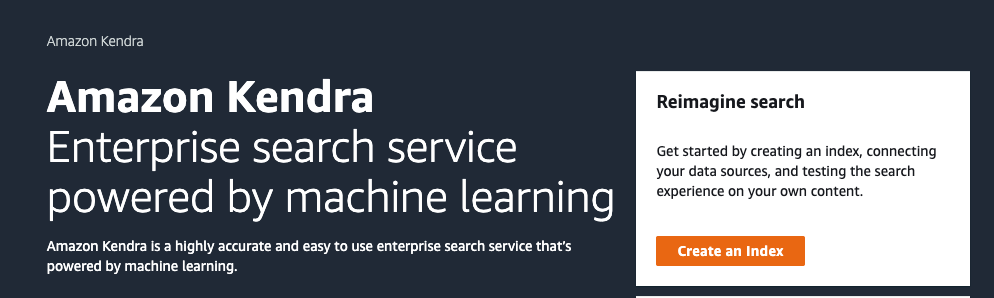

2. Specify the index details as shown here. Create a new IAM role and give it a name

3. In the next window, choose default settings for "Configure user access control" 

4. Choose default settings for "Specify provisioning" i.e. developer edition. The developer edition provides the following:

- Up to 5 indexes with up to 5 data sources each.
- 10,000 documents or 3 GB of extracted text.
- Approximately 4,000 queries per day

Index creation will around 15~20 min.

## Ingesting Data

Amazon Kendra offers a connector for Amazon S3 that allows document ingestion to Kendra using S3 as the data source.

For this workshop, you are going to index a set of AWS whitepapers in PDF format, these documents are stored on different directories within the archive depending on their category, for example Best_Practices. 

In the next step you will unzip and upload these documents to an S3 bucket to ingest them to Amazon Kendra and explore what kind of results you can obtain. You can upload the documents as they are when uncompressed, so the S3 bucket has the same structure as the original directory. Kendra will be able to process the sub folders in S3.

You can define which S3 prefixes can be included or excluded from crawling on the "Additional options" section.

If you need crawl webpages, one of the ways is to use the **web crawler that kendra offers** which will crawl and index the documents. When you use the web crawler to crawl webpages and index them as your documents, you specify the websites you want to crawl and index. You provide either the seed or starting point URLs or the sitemap URLs. 
https://docs.aws.amazon.com/kendra/latest/dg/data-source-web-crawler.html

1. Create a S3 bucket by giving a unique name and keeping rest of the settings default. Next, create the folder "whitepapers"

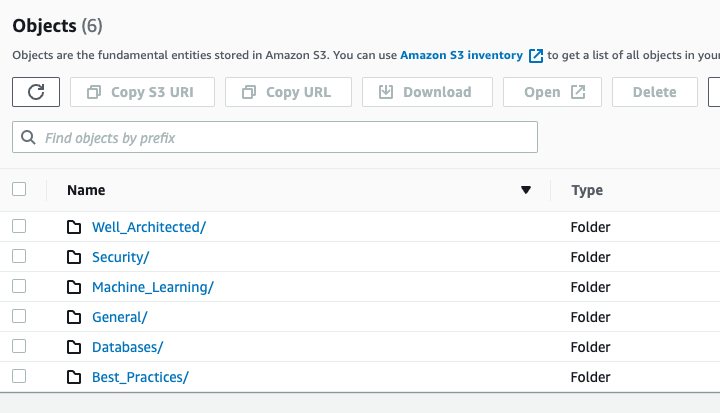

2. Now that you have the documents into an S3 bucket, you can go to the Amazon Kendra console, go to your index and click on Datasources.

3. CLick on "add data sources" and click on "Add Connector" for Amazon S3.

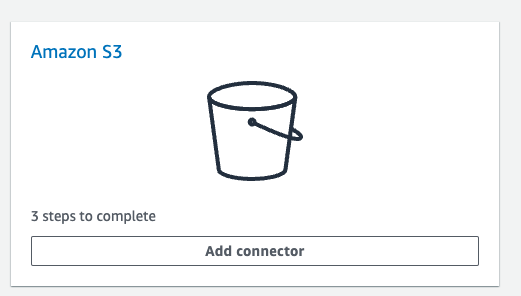

4. Specify data source name e.g. "workshop_s3_connector"

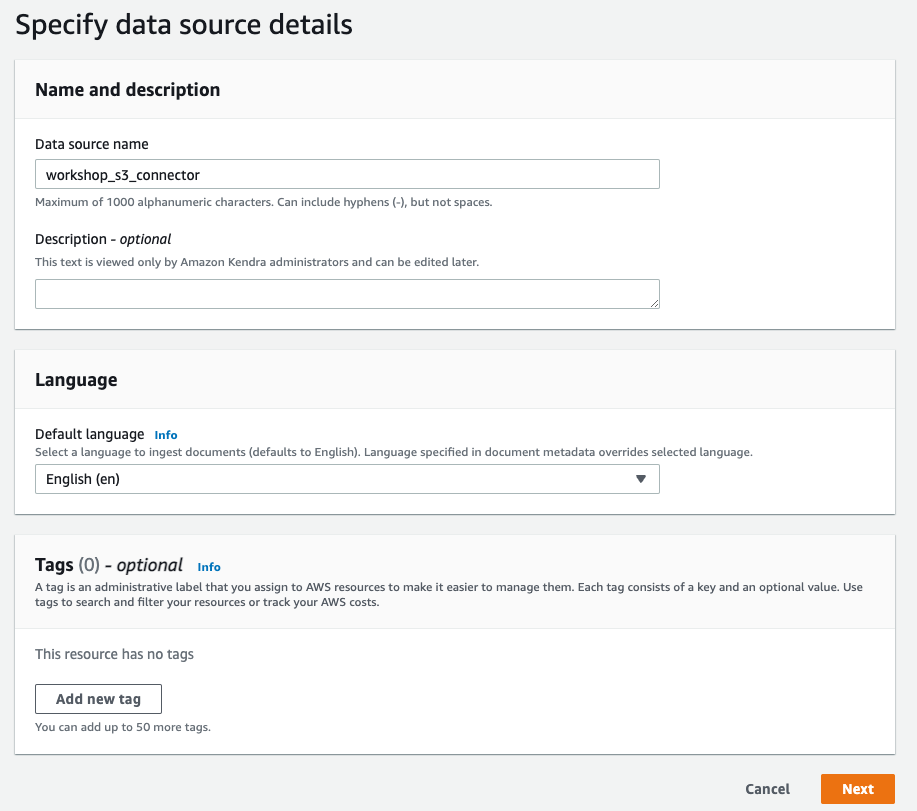

5. Under sync settings, browse S3 and select the bucket name.

6. Under additional configuration, you can include the prefix, which is same as your S3 folder name e.g. "whitepapers" 

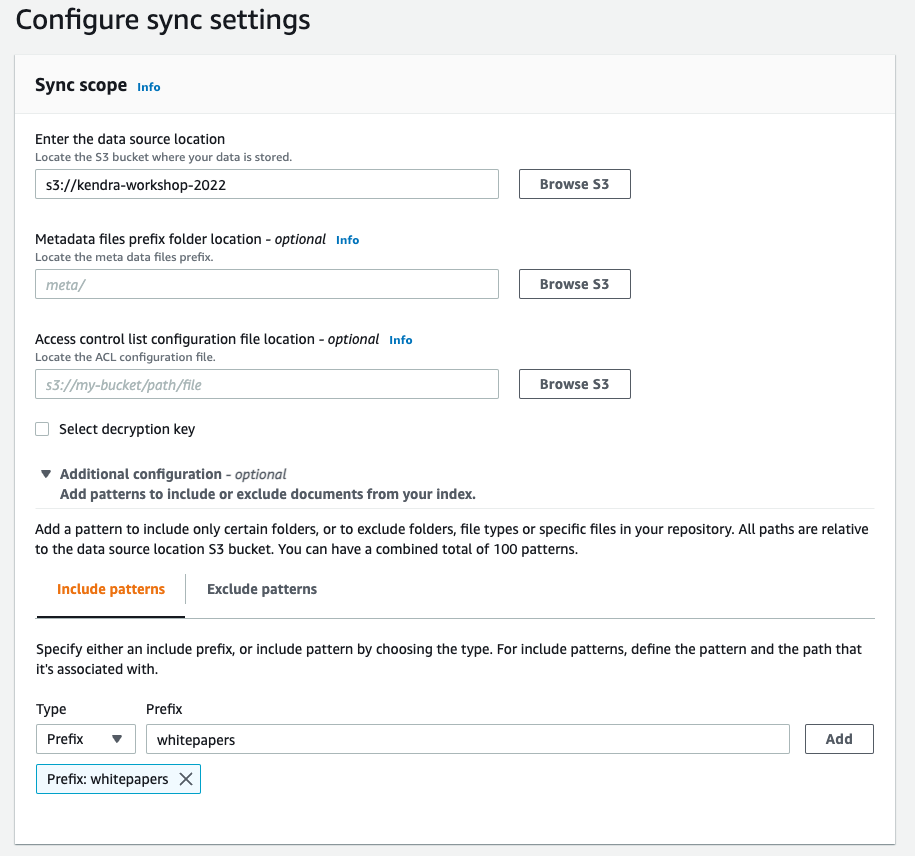

7. Create a New IAM Role.

8. On the Set sync run schedule click on Next.

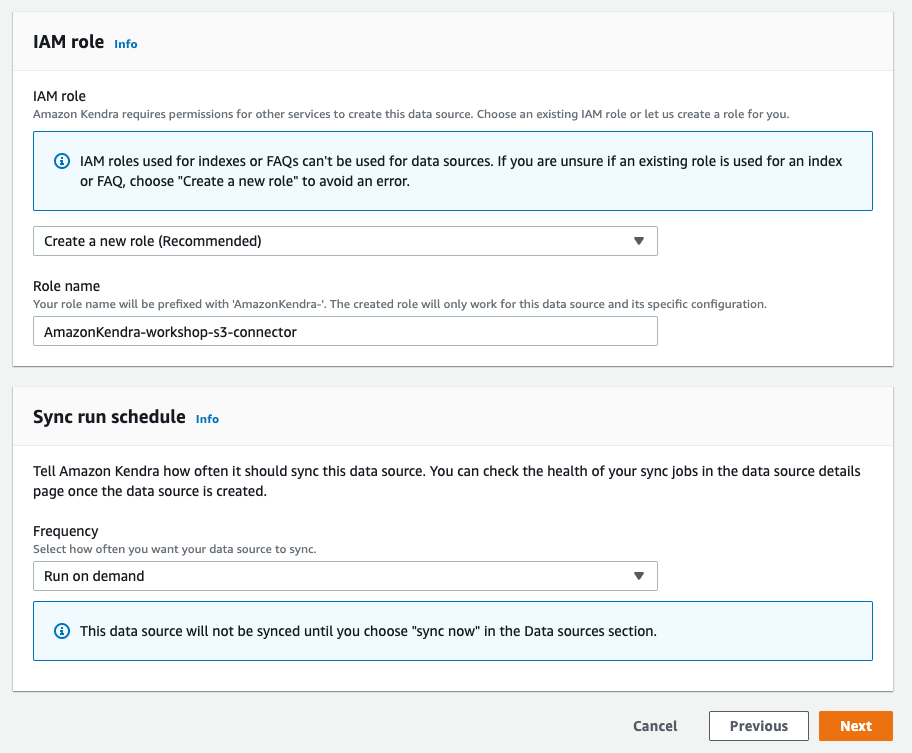

9. Click on Add data source. 

10. After the creation process is complete, click on **Sync Now.**

Syncing will take 5~10 min 

## Adding metadata and creating custom attributes

Now, we will use some metadata so that we can add soem custom attributes to the search such as "Category" to enrich our search query. This will help to narrow down the search to specific categories and also allow you to boost the search if needed.

**We should keep the metadata files in the same folder as the documents.**

There should be one metadata file per input file. 
**How Kendra detects the metadata file is based on the naming convention. If file name is "AmazonS3BestPractices.pdf" then metadata file should be "AmazonS3BestPractices.pdf.metadata.json"** This is important! 

Amazon Kendra has 15 **Reserved Attributes** that you can use or you can create **Custom Attributes**. 

Example of reserved attributes:

_authors (String list) – A list of one or more authors responsible for the content of the document.<br>
_category (String) – A category that places a document in a specific group.<br>
_source_uri (String) – The URI where the document is available. For example, the URI of the document on a company website.

Below is one example of metadata extracted from a PDF doc - "AmazonS3BestPractices.pdf"

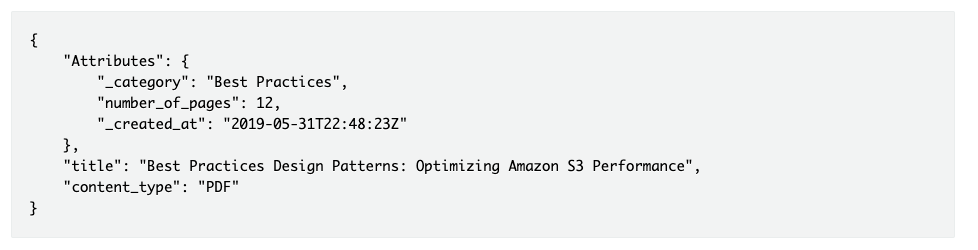

Please go ahead and download this new dataset with documents and metadata, unzip it and import to S3. You can create a new folder called "whitepapers_with_metadata"

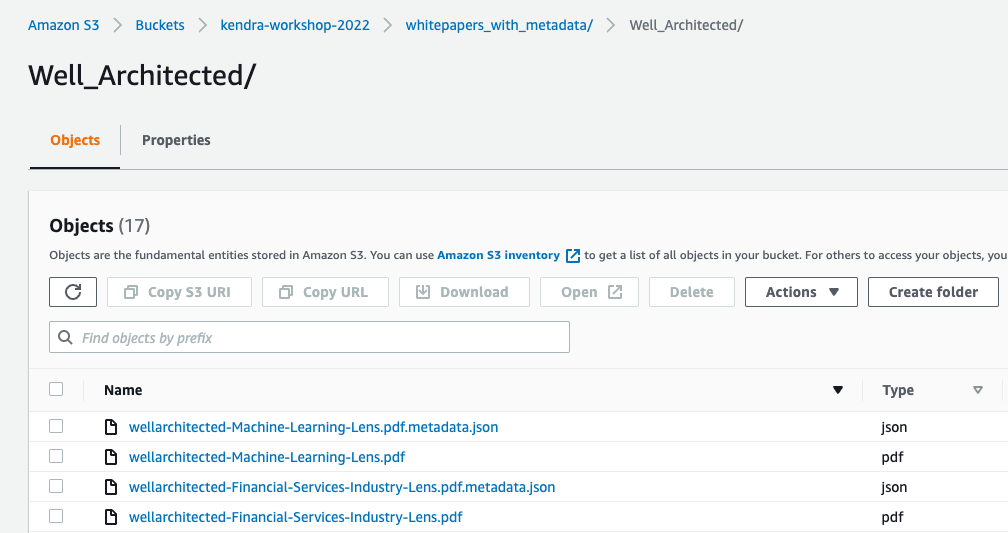

Next, we will be creating some **FACET**s so that we can filter our search by the metadata that we just uploaded. Navigate back to your Kendra index. You will be introducing a new attribute (field) into your index, **the number of pages**



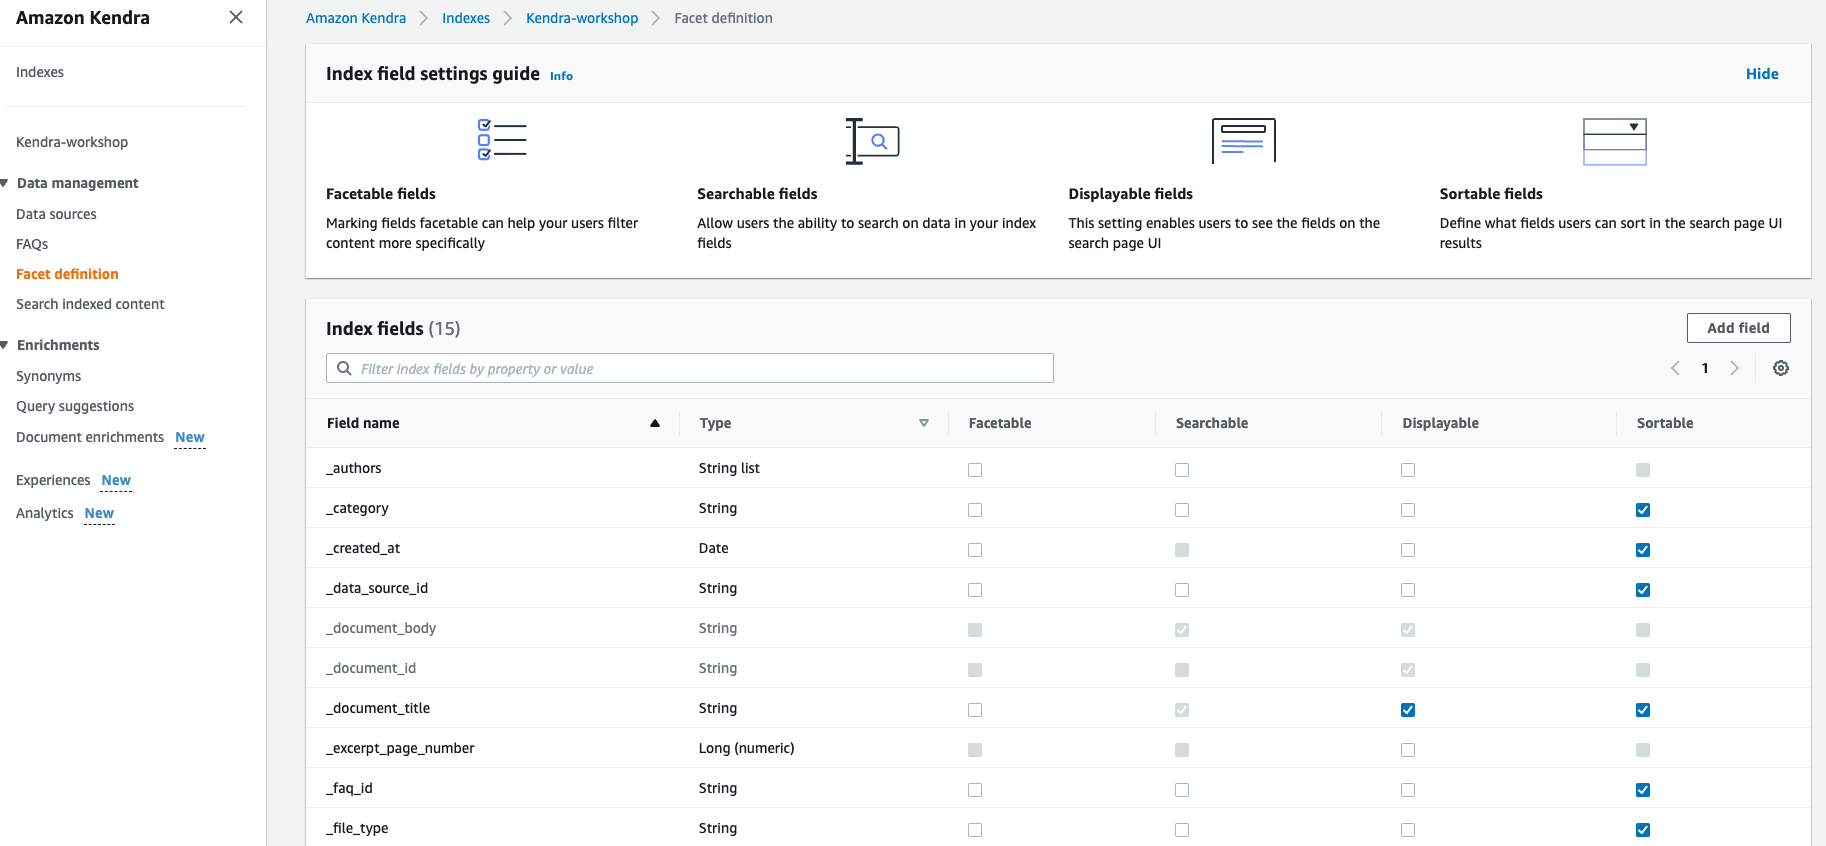


Click on "add field" and **add a custom field for "number_of_pages"**


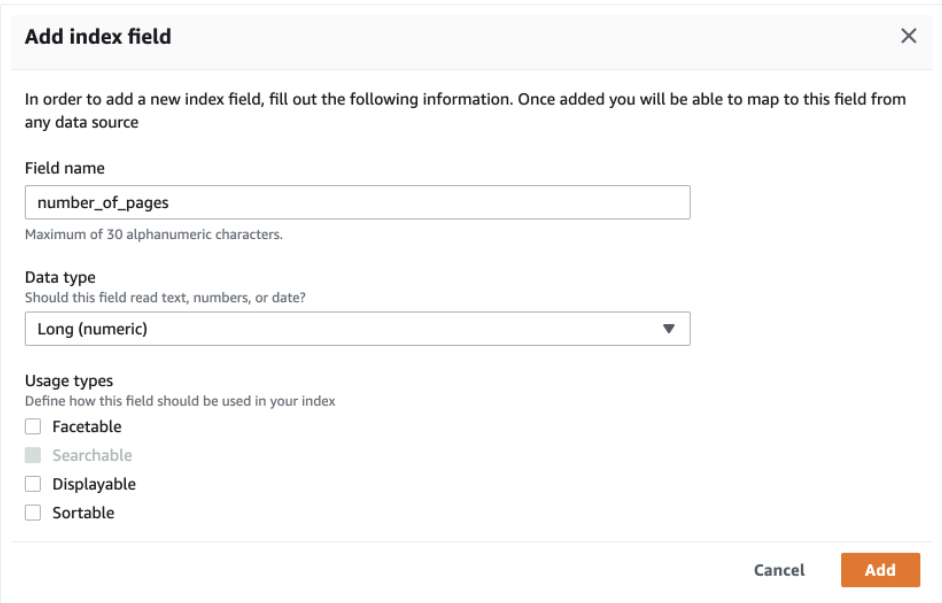

Also, change the "_category" field to be facetable

Next, we will **sync the index to get the metadata files added**. To do that, go back to your index and edit the data source.

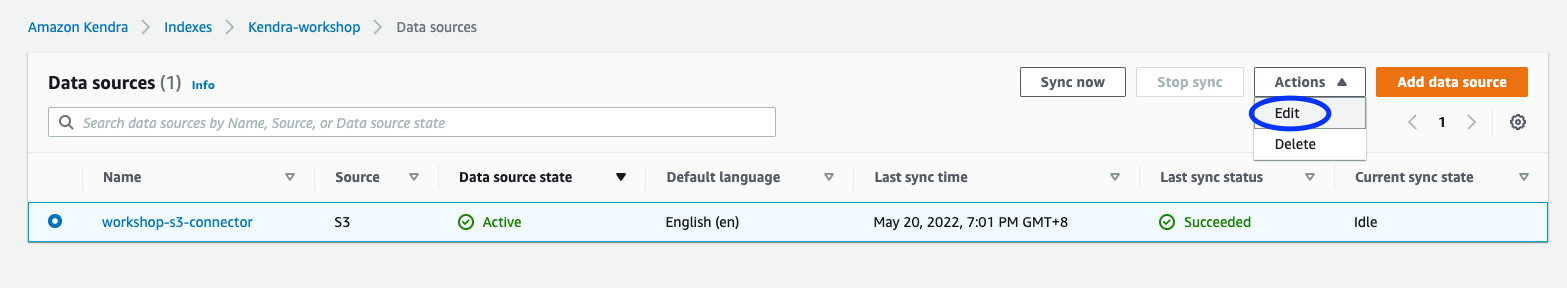

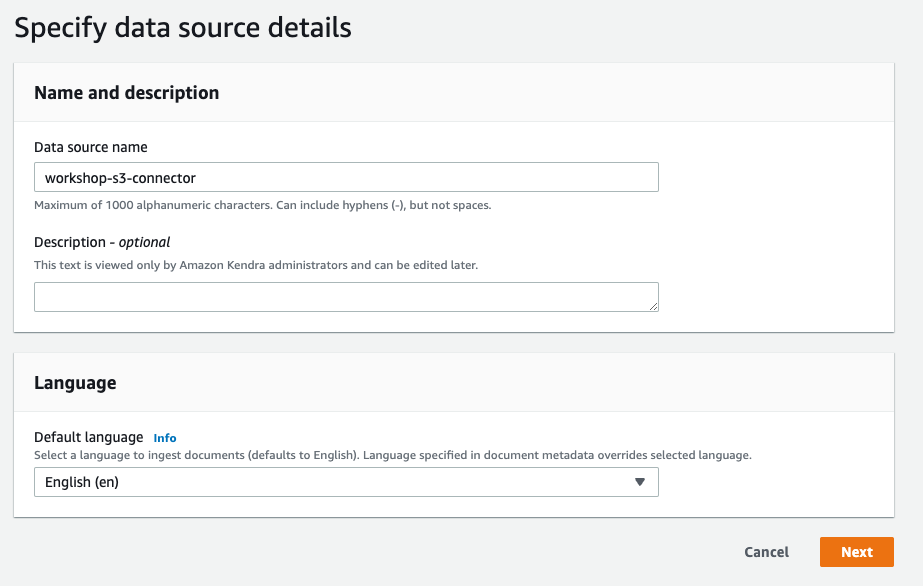

Under Additional Options on the Include patterns tab, remove the previous path you defined and add "whitepapers_with_metadata"

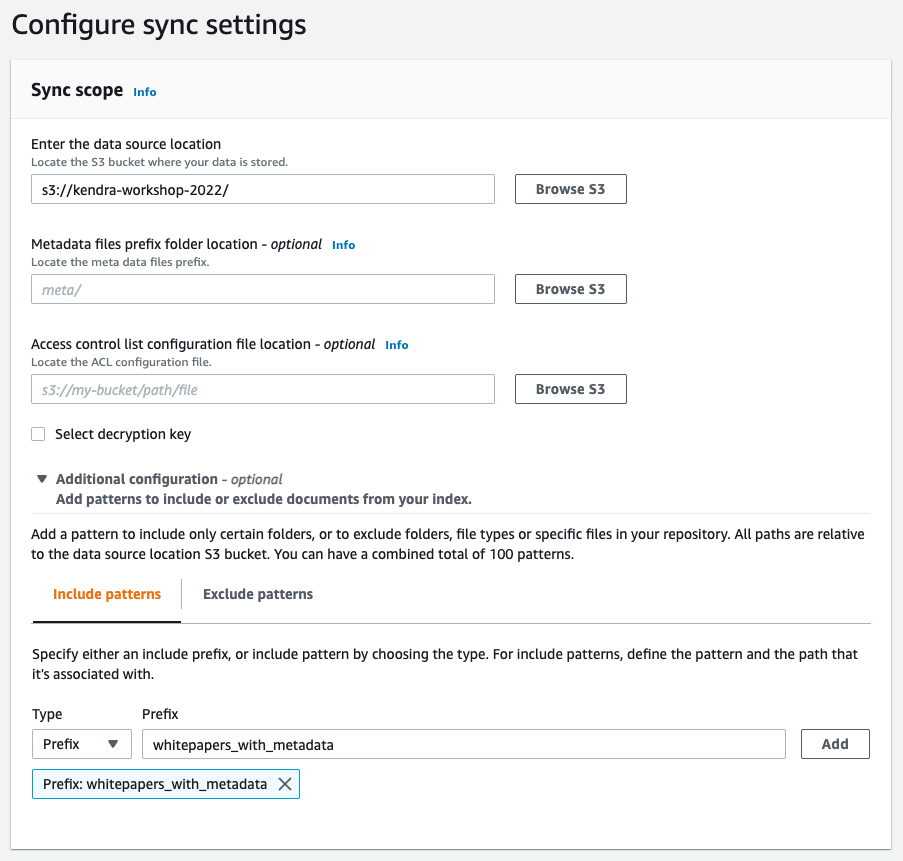

Click **Next** and **Confirm Changes**.

Click on **Sync now**

Now, let's go to the console and test the search again to see whether we can see the category as filter

## Creating a FAQ document and adding FAQ to index

**First step is to create a FAQ file**. FAQ files need to be in specific formats as mentioned in the below link.
https://docs.aws.amazon.com/kendra/latest/dg/in-creating-faq.html

**A basic CSV file** format: <br>
Use a basic .csv file when you want to use a simple structure for your FAQs. In a basic .csv file, each line has two or three fields: question, answer, and an optional source URI that points to a document with more information.


**A custom CSV file** format: <br>
The .csv file must contain the following two required attributes:<br>

_question: The frequently asked question <br>
_answer: The answer to the frequently asked question <br>
Your file can also contain built-in and custom attributes. <br>

Below is what we will use (a basic CSV file)

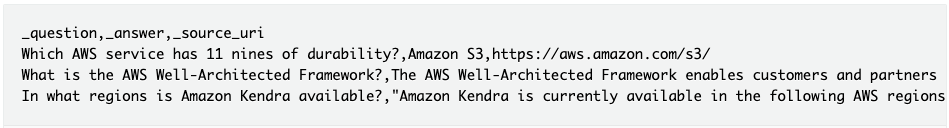

**You can easily add the FAQ file to the index using the console.** 

1) Import the FAQ file to your S3 bucket <br>


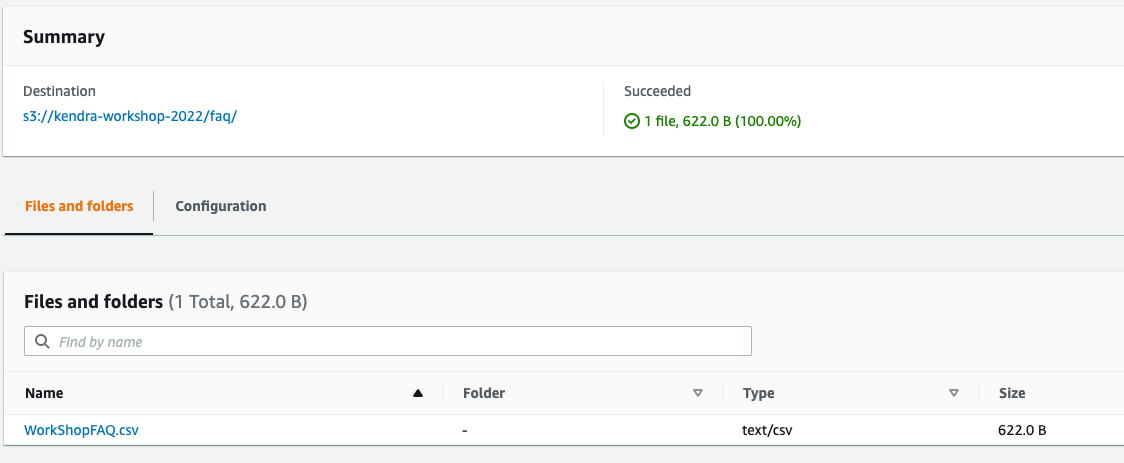

2) Use console to add the FAQ file to the index. 

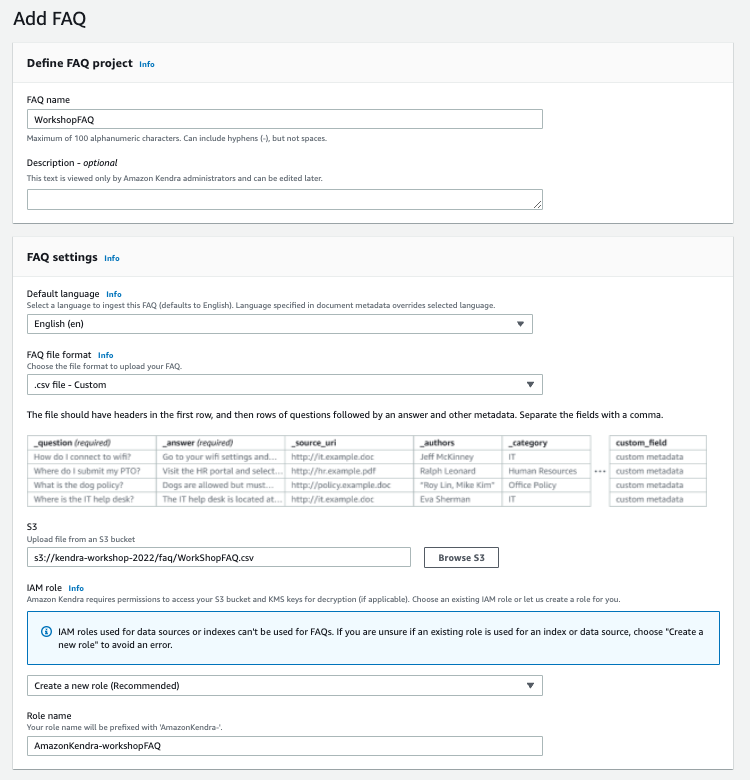

Please note that **if you want to modify the FAQ document after you create the FAQ in Kendra, you will need to delete the existing FAQ and create a new one**

**Maximum size of 1 FAQ file: 1MB and total # of FAQ files: 30. This service quota can be increased upon request**

It might take a min or two to see the FAQ appearing in the search.




## Adding Synonyms

To add synonyms to an index, you specify them in a thesaurus file. You can include business-specific terms such as (EP=Employment Pass) in Amazon Kendra using synonyms. Generic English synonyms, such as leader, head, are built into Amazon Kendra and should not be included in a thesaurus file. 

Although synonyms can improve search accuracy, it is important to understand how synonyms affect latency so you can optimize for this.

There are two ways to specify synonym mappings:

**Bidirectional synonyms** are specified as a comma-separated list of terms. If the token matches any of the terms, then all the terms in the list are substituted, which includes the original token.

*Example:*
ML, Machine learning


**Unidirectional synonyms** are specified as two comma-separated lists of terms with the symbol "=>" between them. If the token matches any word on the left, then the list on the right is substituted. Mapping is only from the left to the right.

**You can have up to 10 synonyms per term**

**It can take up to 30 minutes to see the effects of your updated thesaurus file**


## Using Kendra Query

Before you can query using Kendra API, you need to first add Kendra access to your SageMaker role.

Go to SageMaker and copy the execution role that you created while creating the Jupyter notebook. Go to IAM, and search for the SageMaker Execution role that you copied. Click on the role and add permission > Attach policies. Then search for Kendra in the policies and select 'AmazonKendraFullAccess' > Attach it.

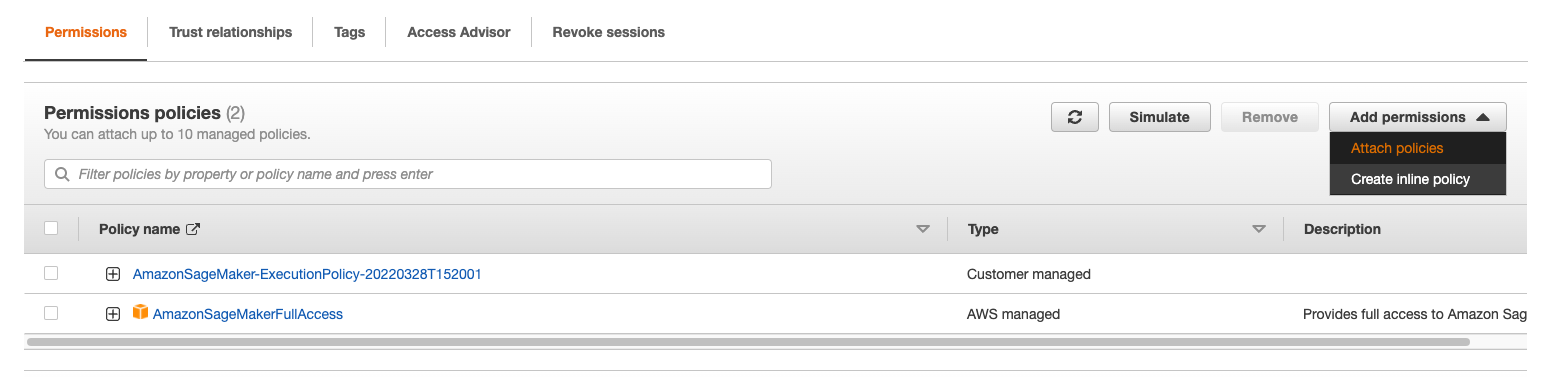

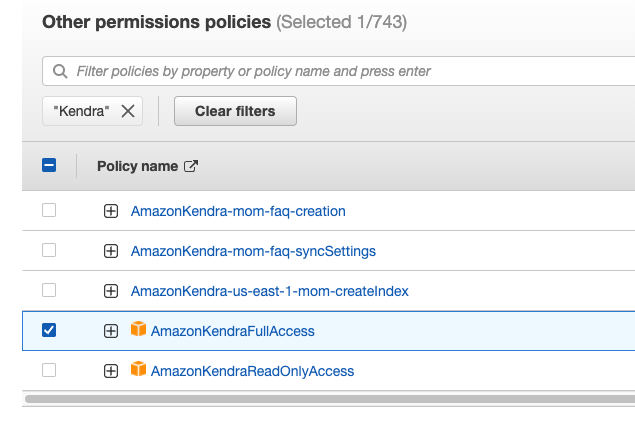

**Now, we will do some Kendra query using API**

In [ ]:
import boto3
kendra = boto3.client('kendra')

Now, copy the IndexId from the Kendra console (click on the index that you created and you will see the Index settings).

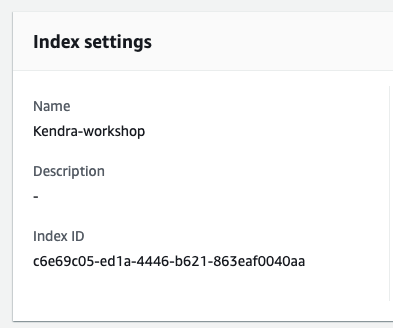

In [ ]:
#query = 'what is the difference between AI and ML'
query='Is dynamoDB serverless'

In [ ]:
response=kendra.query(
        QueryText = query,
        IndexId = 'c6e69c05-ed1a-4446-b621-863eaf0040aa',
        #QueryResultTypeFilter='ANSWER'
)

In [ ]:
# Print function to return the most similar answers to the query based on semantic similarity.
def print_results(response, result_number):
    print ('\nSearch results for query: ' + query + '\n') 
    print('-----------------------------------')
    count = 0
    for query_result in response['ResultItems']:
        
        if query_result['Type']=='QUESTION_ANSWER':
            document_text = query_result['AdditionalAttributes'][1]['Value']['TextWithHighlightsValue']['Text']
            print('Type: ' + str(query_result['Type']))
            print('Document_name: ' + query_result['DocumentAttributes'][0]['Value']['StringValue']+'\n')
            print(document_text)
            print('-----------------------------------')
            count += 1

        if query_result['Type']=='ANSWER':
            answer_text = query_result['AdditionalAttributes'][0]['Value']['TextWithHighlightsValue']['Text']
            print('Type: ' + str(query_result['Type']))
            print('Document_name: ' + query_result['DocumentAttributes'][2]['Value']['StringValue']+'\n')
            print(answer_text)                        
            print('-----------------------------------')
            count += 1
            
        if query_result['Type']=='DOCUMENT':
            document_text = query_result['DocumentExcerpt']['Text']
            print('Type: ' + str(query_result['Type']))
            print('Document_name: ' + query_result['DocumentAttributes'][2]['Value']['StringValue']+'\n')
            print(document_text)
            print('-----------------------------------')
            count += 1
            
        if count >= result_number:
            break

In [ ]:
print_results(response, 3) 

In [ ]:
# import pprint
# pprint.pprint(response)

## Tuning search relevance using Query


Amazon Kendra queries produce search results ranked by their relevance. You can modify the effect of a field or attribute on the search relevance through relevance tuning. Tuning search relevance can either be done manually at the **index level**, where you set tuning configurations for your index, or at the **query level** by overriding configurations set at the index level.

**When you use relevance tuning with an attribute, a result is given a boost in the response when there is a match with the attribute value. You also specify how much of a boost the document receives when there is a match.** 

You set the amount of boost that a document receives by using the **Importance** parameter. The higher the Importance, the more the field or attribute boosts the relevance of a document. 

Relevance tuning doesn't cause Amazon Kendra to include a document in the query response, it is only one of the factors that Amazon Kendra uses to determine the relevance of a document.

You can specify date, number, or string attributes to tune an index or tune at the query level.

**Date fields or attributes** – There are three specific criteria for date fields, Duration, Freshness and RankOrder.

**Duration** sets the time period that the boost applies to. <br>
**Freshness** determines how recent a document is when applied to a field or attribute. If you apply Freshness to either the field for date created or date last updated, then a more recently created or last updated document is considered "fresher" than an older document. The fresher the document, the more this boost is applied. You can only have one Freshness field in your index.<br>
**RankOrder** applies the boost in either ascending or descending order. 

**Number fields or attributes** – For number fields or attributes, you can specify the rank order that Amazon Kendra should use when determining the relevance of the field or attribute. If you specify ASCENDING, then higher numbers are given precedence. If you specify DESCENDING, then lower numbers have precedence.

**String fields or attributes** – For string fields or attributes, you can create categories of a field to give each category a different boost. For example, if you boost a field or attribute called "Passes for professionals", you can give a different boost to documents from "Employment Pass" than to documents from "Personalised Employment Pass". You can boost a field or attribute of the type String. You can boost StringList fields only at the index level.

Here, as an example, we will be using *Document_name* field to increase the relevance importance.

In [ ]:
response_new=kendra.query(
        QueryText = query,
        IndexId = 'c6e69c05-ed1a-4446-b621-863eaf0040aa',
        DocumentRelevanceOverrideConfigurations=[
            {
            "Name": "_document_title",
            "Relevance": {
                "Importance": 10
            }
        }
        ]
)

Now, let's see if the query result is different from above for the document category.

In [ ]:
print_results(response_new, 3) 

## Tuning search relevance at Index level

If you update search relevance at index level, you will not be able to customize at query level.

Before we do relevance tuning at index level for "_document_title", let's verify if the boost value is 1

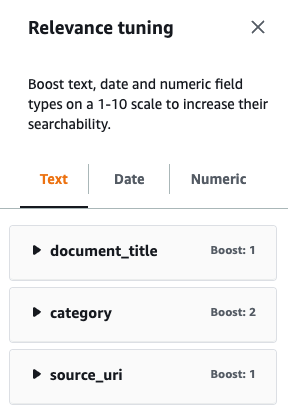

Now, let's increase the boost value to 5

In [ ]:
response = kendra.update_index(
    Id='c6e69c05-ed1a-4446-b621-863eaf0040aa',
    DocumentMetadataConfigurationUpdates=[
        {
            'Name': '_document_title',
            'Type': 'STRING_VALUE',
            'Relevance': {
                'Importance': 5
            }
        }
    ])

Now, we can go to the console and check if the boosting is really 5. 

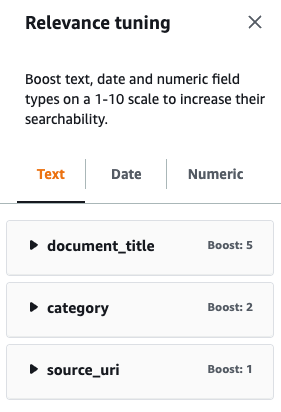

## Submitting feedback for incremental learning


Kendra uses incremental learning to improve search results. Using feedback from queries, incremental learning improves the ranking algorithms and optimizes search results for greater accuracy.

Incremental learning is enabled for all indexes and for all document types.

Kendra starts learning as soon as you provide feedback, though it can take over 24 hours to see the results of the feedback. 

Amazon Kendra provides **3 methods for you to submit feedback**: 

- AWS console, 
- A JavaScript library that you can include on your search results page, 
- An API that you can use.

Amazon Kendra accepts **two types of user feedback**:

- **Clicks**:  Information about which query results the user chose. To submit click feedback, your application must collect click information from the activities of your users, and then submit that information to Amazon Kendra. You can collect click information with the console, the JavaScript library, and the Amazon Kendra API. 

- **Relevance**: Information about the relevance of a search result, which the user typically provides. The feedback contains the result ID and a relevance indicator (RELEVANT or NOT_RELEVANT). You can only collect relevance information with the console and the Amazon Kendra API.

Links to Documentation:

https://docs.aws.amazon.com/kendra/latest/dg/feedback-javascript.html



## Query Suggestion Config

You can use the below to check default config for query suggestion and also update the default setting

In [ ]:
response = kendra.describe_query_suggestions_config(
    IndexId='c6e69c05-ed1a-4446-b621-863eaf0040aa'
)

In [ ]:
response

Now, let's change the "MinimumQueryCount" from 3 to 2

In [ ]:
response = kendra.update_query_suggestions_config(
    IndexId='c6e69c05-ed1a-4446-b621-863eaf0040aa',
    MinimumNumberOfQueryingUsers=3,
    MinimumQueryCount=3
)

In [ ]:
response = kendra.describe_query_suggestions_config(
    IndexId='c6e69c05-ed1a-4446-b621-863eaf0040aa'
)

In [ ]:
response